# COVID Related Death Predictions

---
## Abstract
---

This project uses data released by the Mexico government which has over 1,000,000 people recorded (unique identifications stripped of course) as well as their COVID test result, whether or not they have a series of risk factors, the area they live in, differents types of care provided, and whether or not they have died. This project looks at only the people who tested positive for COVID, and tries to predict their outcome (live or die) based on their underlying health factors. Many variations of the Logistic Regression and tree based classification machine learning algorithms are considered using this data. In the end, a logistic regression model using features deemed necessary by backward stepwise feature selection is kept. The model acheives a test accuracy, precision, and recall of 90.59%, 59.66%, and 36.24%, respectively. The intended use for the Logistic Regression model is in hospitals where a patient with COVID can have their risk of death assessed using their underlying risk factors, allowing the hospital to manage resources accordingly. The risk factors used in this model are whether or not the patient has pneumonia, or kidney failure, as well as their age, and sex. Out of these features, pneumonia has the most influence on the model, followed by kidney failure and age. However, it is important to note this model does suffer from low recall and precision, and this must be considered before using this model.

---
## Introduction
---

The Novel Coronavirus, known as COVID19, has been sweeping across the world throughout 2020. As a response, researchers have been scrambling to try and identify which groups of the population are most at risk. They have done a great job of identifying major risk factors that impact the toll COVID19 may take on a particular person. The major risk factors we have heard about in the news have been Age, Obesity, and Heart Disease, but there may be more. We have also seen that a person's chances for success in a battle with COVID19 often are dictated by the health care available to them. But how much of an impact do all of these factors individually have in dictating your standing against COVID19? And what if more than one of these factors apply to you? This project tries to answer these questions. <br>

---
## Motivations
---

1. Many people don't understand the severity of COVID19 and therefore aren't taking proper precautions. In countries like the United States, this has been a great hinderance in controlling the spread of COVID19. People are used to hearing things like "If you are Obese then you are high risk if you get COVID" or "If you have Heart Disease then you are at high risk if you get COVID". However, for many people, it is hard to understand the severity from such a stand alone statement. However, maybe using a predictive tool with your exact underlying conditions that also tells you an accompanying probability would be more compelling.<br>
2. Being able to estimate the probability of death for a given patient may be very useful in a hospital that is overwhelmed with patients. It may help in deciding where to send certain resources, anticipating which patients are likely to need resources throughout their treatment.

---
## Data
---

This data set came from a Mexican Government [website](https://www.gob.mx/salud/documentos/datos-abiertos-152127). I found a link to this dataset in a [kaggle](https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset) project that somebody has done. I thought that finding COVID data would be easier than this, but it turns out that HIPPA laws do not allow data on the individual patient level to be made available to the public even if their names are left out. Therefore, only summary level data sets (like by county, or by age group) are able to be viewed by the public. This data set from the Mexican Government is at the individual patient level and doesn't provide any patient identification information.<br>
The raw data was in Spanish, so was translated. Also, all qualitative features have accompanied value mappings. These have been handled in the data cleaning procedures (see link at bottom of Data section).

### Binary Features

<b>Yes or No Features: </b>The presence of Pneumonia, Pregnancy, Diabetes, Chronic Obstructive Pulmonary Disease (COPD), Asthma, Immunosuppression, Hypertension, Cardiovascular Disease, Obesity, Kidney Failure, Other Diseases (umbrella feature), and whether the person is a smoker. Lastly, the <b>target variable "Died"</b> is a yes or no feature.

### Other Qualitative Features

The <b>Sex</b> of the person (either Male of Female). For interpretability, I have turned this into two separate dummy variables.

<b>The Entity (state)</b> the person resides in. This feature has been grouped into three subgroups as a function of the death rates and then encoded into three dummy variables.

All encoding was done using OneHotEncoder from sklearn.

### Quantitative Feature

The persons <b>Age</b>.

###  Engineered Features

<b>Total Factors</b> - provides a sum of the number of risk factors a person has. <br>
<b>New Age</b> - this feature came to mind when noticing that the age groups under 35 have a pretty uniform death rate. Afterwards, the death rate steadily increases until age 90, where the death rate actually starts to decline. I think the decline in death rate after 90 is due to a small population in the data set belonging to these age groups. I don't think that being over the age of 90 gives you an edge over COVID. This feature assigns the age of anybody under the age of 35 as 35, and anybody over the age of 90 as 90. The New Age term compared to the regular Age term can be seen below. This New Age feature will take the place of Age.

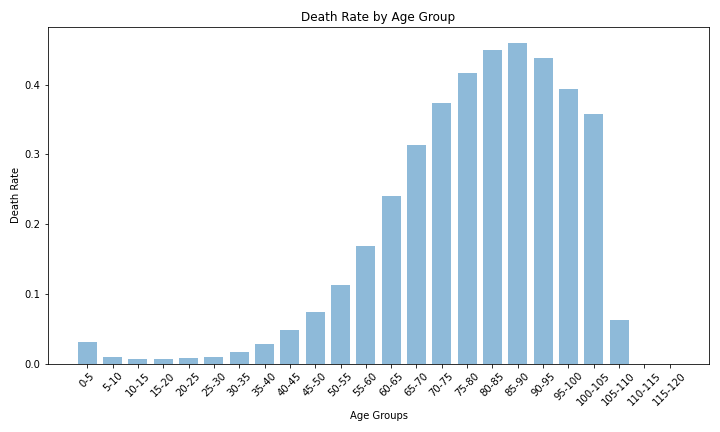

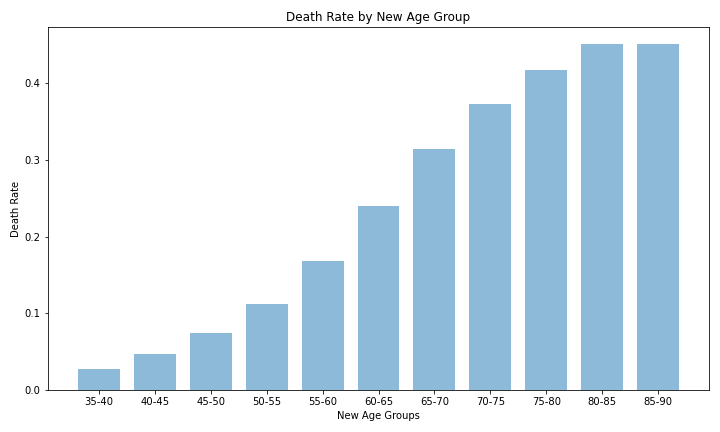

<b>Figure 0: </b>The <b>top graph</b> shows the original Age group. The death rates for people under the age of 35 looks roughly uniform (other than the slight rise for ages 0-5). After the age of 90, the death rate declines. I believe this is not representative of the true death rate for people over the age of 90, but rather undersampling in the data (which can't be controlled in this instance). The <b>bottom graph</b> shows the engineered age feature New Age. This shows a clean, steady rise in death rates as a function of age.

### Collinearity in the Data

There is quite a bit of collinearity in the data. This is to be expected because the more unhealthy a person is, the more likely they are to develop more risk factors. Also, as people get older, they become more likely to develop risk factors too. The table below shows the correlations between the risk factors used in this project. The correlations look low at first, but given their binary nature, these figures are somewhat significant.

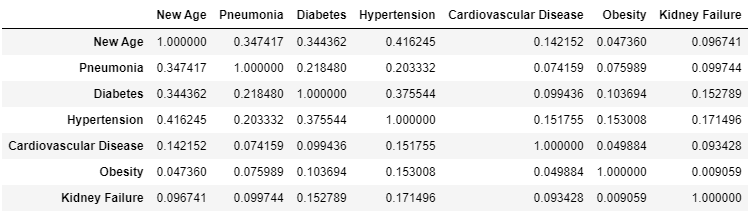

In particular, we can see that a higher age is associated with more pneumonia, diabetes, hypertension, and cardiovascular disease. Also, pneumonia is associated with higher rates of diabetes and hypertension. Another correlation is found between diabetes and hyptertension. These are the strongest correlations in the table. <br>
One attempt at eliminating collinearity when creating models is to remove the feature creating the collinearity. However, with the ammount of collinearity in this data, this would remove too much of the data. Therefore, I am moving forward in this project with the whole data set, but am staying mindful of these collinearities.

#### Data cleaning procedures can be found <a href=https://github.com/harperd17/COVID-Death-Rates/blob/master/Notebooks/Data_Cleanup.ipynb>here. </a>

---
## Related Work
---

With COVID sweeping across the world, there are a lot of studies being done on COVID. The CDC in the United States is constantly posting updated data on COVID cases and deaths in the United States. All of the data available through the CDC is only at an aggregated level, meaning they only report numbers by some grouping such as state. They are very good about reporting all sorts of risk factors with the accompanied proportions of deaths and cases across these risk factors. Common risk factors presented are similar to those studied in this project. <br>
I'm also sure that hospitals have been utilizing their data collected from COVID cases so far in attempts to better manage the patient flow while experiencing higher than normal volume due to COVID. <br>
Lastly, I had found out about this data set through related work of a Kaggle project found [here](https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset) where the author uses this dataset in order to predict whether someone will require intensive care (ICU) based on their underlying risk factors. To preserve originality, I decided to predict death rather than ICU.<br>
---

## Proposed Methods
---

Among different machine learning classification techniques, Logistic Regression and Decision Tree Analysis are explored in this project. Logistic Regression is a strong and very often used analysis tool for predicting binary outcomes, especially in the medical field. Since a motivation for this project is hospital use, Logistic Regression is a technique that many workers would likely recognize and feel more comfortable with, making it an abvious choice for exploration. <br>
Decision Tree analysis also seems like a good analysis method to explore since they can be easily interpreted and used for making decisions on the fly (as long as it is a single decision tree and doesn't involve a combination of trees like random forests. Random forests are also explored in this project, though, because of the lowered variance in error). <br>
These models will be developed using training data that consists of 95% of the data available. After performing cross validation on the proposed models, the final chosen model will be tested using the remaining 5% of the data that was set aside as test data.<br>
In addition, after splitting the data into training and test sets, the New Age and Total Factors are standardized using 'StandardScaler' from sklearn using the training data to fit the standardization and transforming the training and test sets using this fit.

<b>Dummy Classification Rate</b>

From the data, 89.47% of the observations lived. Therfore, this will be considered the base accuracy rate. A model that can acheive a classification accuracy greater than 89.47% would be considered a model better than a 'dummy classifier'.

#### Variables to Consider

For completeness, I would like to initially consider all of the features listed in the Data section above. Below you can see each variable and the associated Death Rate for that specific group of people.

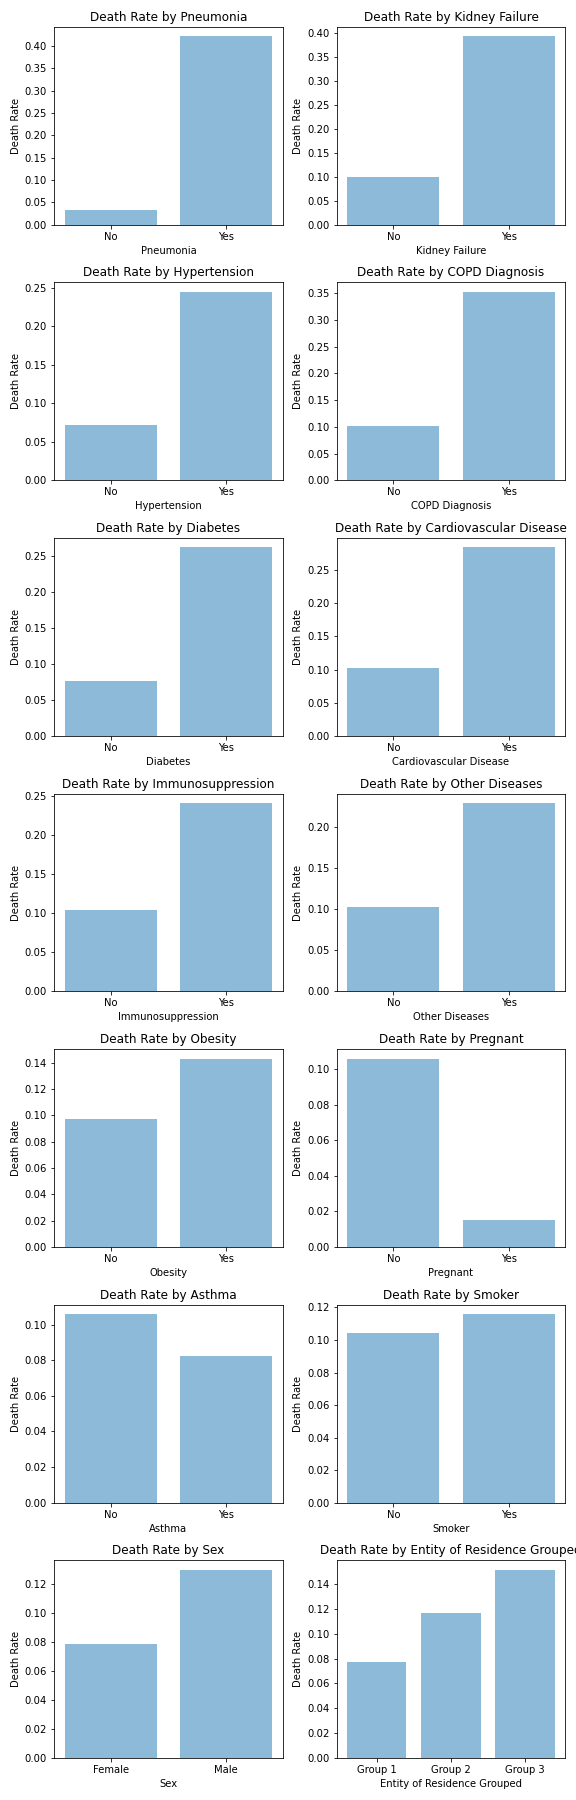

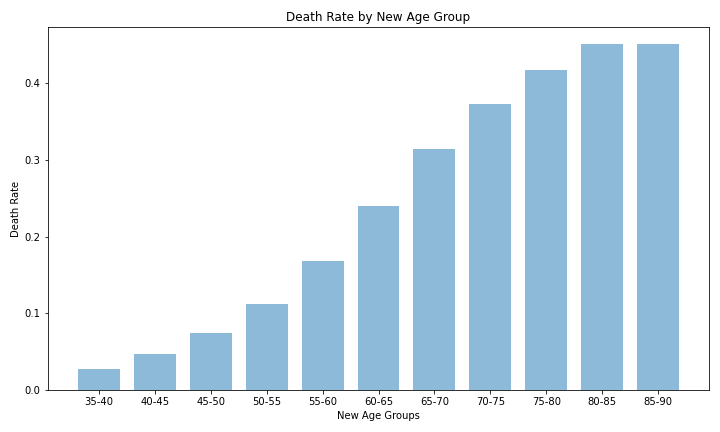

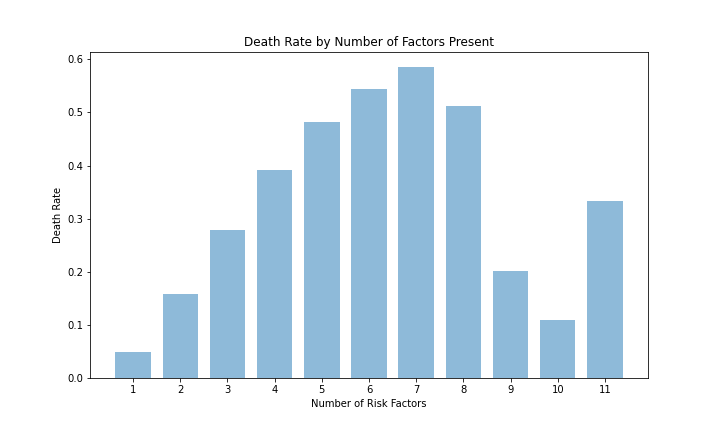

<b>Figure 1:</b> The above plots show that by far, having pneumonia is associated with the highest increase in death rates. Interestingly, being pregnant appears to have a benefit for the death rate. Another interesting thing is that people with asthma appear to have a slightly lower death rate than those without asthma. Also, being a smoker seems to have very little impact on the death rate. Being a male seems to increase the death rate. There are also different death rates depending on which entity (state) someone lives in. I have a hunch that this may be due to differences in the quality of health care across the country. Next, the engineered age feature seems like a good predictor. We can see that the death rate increases as a function of age. Lastly, the death rate generally increases as a function of how many risk factor somebody has.<b> Source code for visualizations can be found <a href=https://github.com/harperd17/COVID-Death-Rates/blob/master/Notebooks/Data_Visualizations.ipynb>here. </a> </b>

#### Interaction Terms to Consider

It seems likely that having a combination of risk factors may increase the probability of death more than the sum of the incremental increases from each risk factor. For some it could also be the case that the probability of death is lower than the sum of the incremental increases from each risk factor. Therefore, I want to consider interactions in this model. However, after using 'PolynomialFeatures' from sklearn, there are well over a hundred possible interactions of degree 2. In choosing which interactions to explore in the model experimentation, I decided to only look at interactions between health risk factors (so not including entity groups interactions with health risk factors) that have a correlation with the target variable of 0.26 or higher. This cutoff seems pretty low at first glance, but correlations between binary features tend to be lower and using this cutoff brought in 10 interaction terms. The interaction terms considered are listed below.

1. Pneumonia X New Age
2. Pneumonia X Total Factors
3. New Age X Total Factors
4. Pneumonia X Sex_2 (Male)
5. Pneumonia X Hypertension
6. Pneumonia X Diabetes
7. Total Factors X Sex_2 (Male)
8. Hypertension X Total Factors
9. Diabetes X Total Factors
10. Hypertension X New Age

---
## Experiments
---
#### All model experimentation code can be found <a href=https://github.com/harperd17/COVID-Death-Rates/blob/master/Notebooks/Final_Classification_Modelling.ipynb>here. </a>

### Logistic Regression Model

<b>Feature Selection: </b><br>
<b>Using Forward Stepwise Selection</b>. Using Figure 2, I found that out of the 29 possible features/interactions, only 5 are necessary to acheive a model with a maximized classification accuracy in terms of test precision, recall, and accuracy. This model has an estimated test accuracy, precision, and recall of 90.77%, 60.54%, and 35.06% respectively. The model details can be seen below.

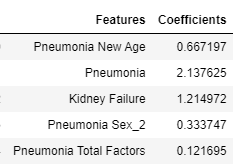

However, this model includes interaction terms, and not all of the features involved in the interactions are in this model. Therefore, I'll add in New Age, Sex_2 (Male), and Total Factors to the model. This update model can be seen below. The updated model has an estimated test accuracy, precision, and recall of 90.72%, 59.78%, and 36.11%. Overall, these metrics are pretty similar to the previous model, but the recall actually increased a little. 

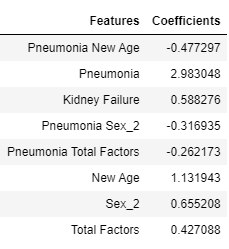

The estimated test metrics presented for these models were calculated using 5-fold cross validation on the training data. The estimated metrics for each model of varying complexities can be seen below in Figure 2.

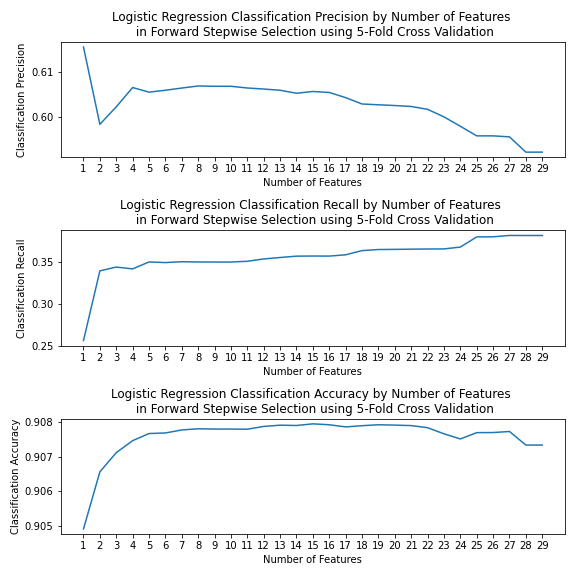

<b>Figure 2: </b>This plot shows the different levels of estimated test precision, recall, and accuracy obtained for logistic regression models of different complexities in terms of the number of features obtained from forward stepwise feature selection. Estimated test metrics were obtained by performing 5-fold cross validation for each model. After the 5 best features have been added, the estimated test accuracy no longer increases, suggesting a model with 5 features is the simplest model for achieving test accuracy.

<b>Using Backward Stepwise Selection</b>. Using Figure 3, I selected only the best 5 features to keep. This model has an estimated test accuracy, precision, and recall of 90.77%, 59.55%, and 38.31% respectively. The estimated test metrics were calculated using 5-fold cross validation on the training data. The model using 5 features can be seen in the table below.

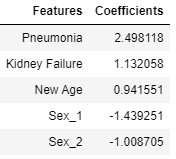

The model with only 5 features contains no interaction terms, which makes it much simpler than the forward selection model. Also, the recall is higher using the backward selection model, while the precision and accuracy are similar to the forward selection model. The details of the test metrics for varying model complexities can be seen below in Figure 3.

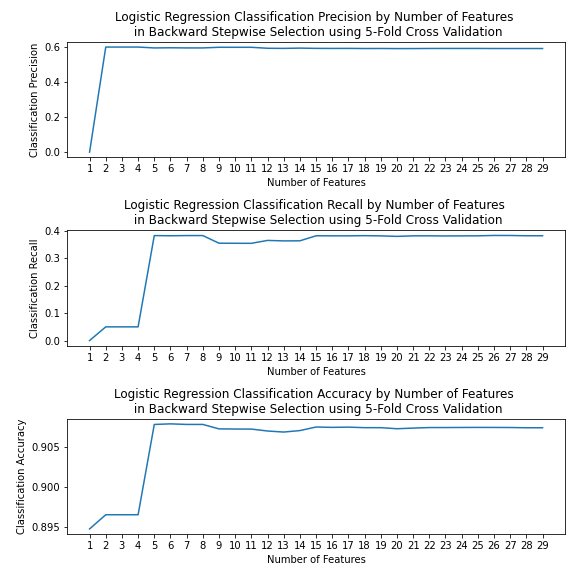

<b>Figure 3: </b>This plot shows the different levels of estimated test metrics obtained for logistic regression models of different complexities in terms of the number of features obtained from backward stepwise feature selection. Estimated test metrics were obtained by performing 5-fold cross validation for each model. The maximized estimated test accuracy, precision, and recall, given the complexity of the underlying model is found from a model containing 5 features.

<b>L2 Regularization. </b>When training a logistic regression model using the L2 addition, I estimated the test metrics as a function of C through 5-fold cross validation. The best value of C in Figure 4 is 10 raised to -2.5 (or ~0.003)  or higher.<br>
Another thing to note is the impact of C on the coefficients of the features. The largest coefficients in terms of absolute value are for the features Pneumonia, New Age, and Total Factors. Unfortunately, we can't use a value of C small enough to lower these coefficients and keep good accuracy, precision, and recall. <br>
However, looking at the bottom figure below, we can see that at C=0.003, the coefficient for Sex_2 is positive instead of negative. This is good because it matches our interpretation from Figure 1 which shows Males have an increased death rate compared to Females. The same is applicable to the coefficients for the Entity Group 3, Diabetes, and Other Diseases features. The original reverse signs of coefficients is likely due to collinearities.<br>

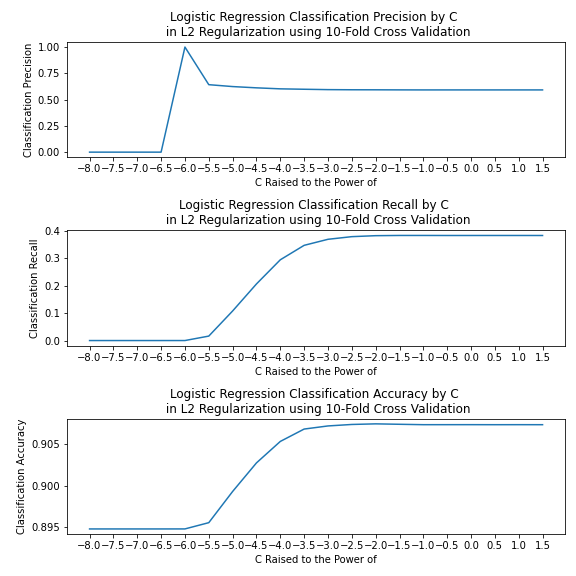

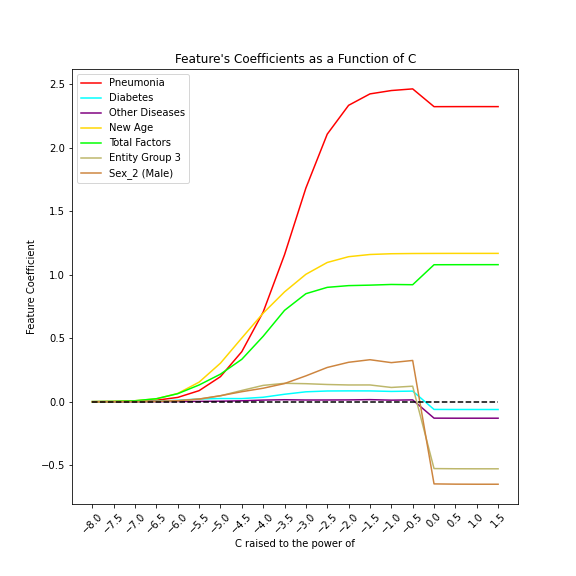

<b>Figure 4:</b> The <b>top figure</b> above shows how changing the value of C, the addition to the cost function when fitting logistic regression, impacts the estimated test metrics of the logistic regression model containing all available features. We can see that using a C less than or equal to 0.003 (or 10 to the power of -2.5) greatly lowers the estimated test accuracy. Increasing the value of C anywhere above 0.003 has very minimal impact on the estimated test accuracy. However, it is also important to note in the <b>bottom figure</b> how changing the value of C impacts the coefficients.

The model that uses C ~ 0.003 in comparison to the model with no regularization (C = 0) is shown below:

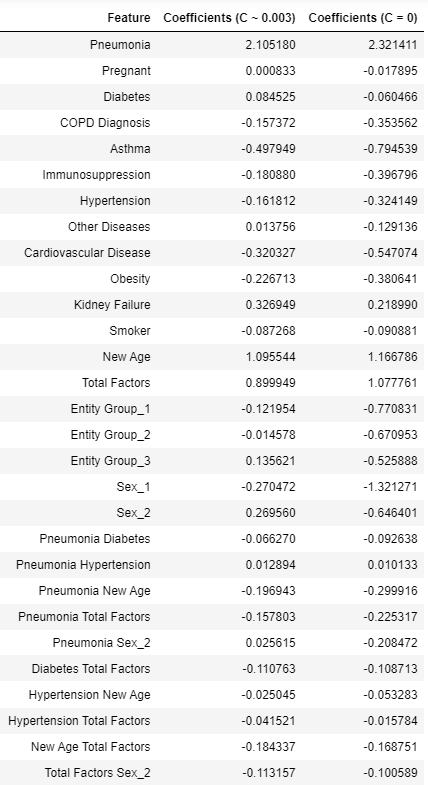

When looking at the coefficients above, many of them are negative for risk factors that are known to increase risk from COVID. The reason they are negative must be due to collinearity. For example, Pneumonia is correlated with other risk factors such as Diabetes and Hypertension. It may be the case that Pneumonia, having such a high coefficient is overestimating it's impact, so other coefficients must become lower to counteract this. This may be a possible explanation for Hypertension having a slightly negative coefficient, and Diabetes having only a slightly positive coefficient, even though both appear to significantly raise the death rate in Figure 1.

When cross validated, the L2 Regularization model with C ~ 0.003 has accuracy, precision, and recall of 90.74%, 59.36%, and 37.82% respectively. This model slightly underperforms compared to the backward selection model.

### Tree-Based Models

I would like to note that all interaction terms were taken out of consideration when implementing these tree based models, because the trees, by their nature, seem to take into account interactions already.

#### Model that is Function of Max Leaf Nodes

When trying out the fit of a tree as a function of the number of max leaf nodes, I came up with the following estimated test metrics. The best decision tree in terms of precision, recall, and accuracy (54.54%, 52.88%, and 90.41% respectively) as well as simplicity falls at only 3 leaf nodes. A tree with higher accuracy could have been chosen, but the recall would have plunged in that scenario.

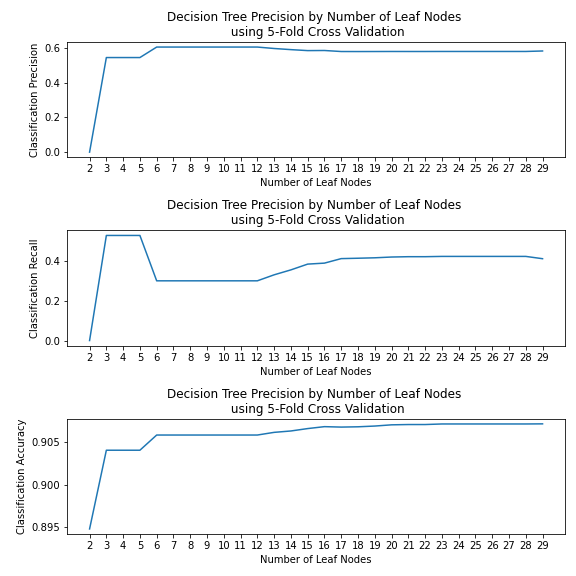

<b>Figure 5: </b>The plot above shows how the estimated test accuracy using 5-fold cross validation changes as a function of the number of leaf nodes the Decision Tree building algorithm was limited to. We can see that around 6 leaf nodes, the estimated test accuracy flattens out. Increasing the leaf nodes further only increases the estimated test accuracy by about 0.2%. However, decreasing the complexity of the tree down to only containing 3 leaf nodes actually increases the recall a good ammount. I think that this increase in estimated test recall makes up for the slight decreases in precision and accuracy.

The decision tree created using 3 leaf nodes is shown below:

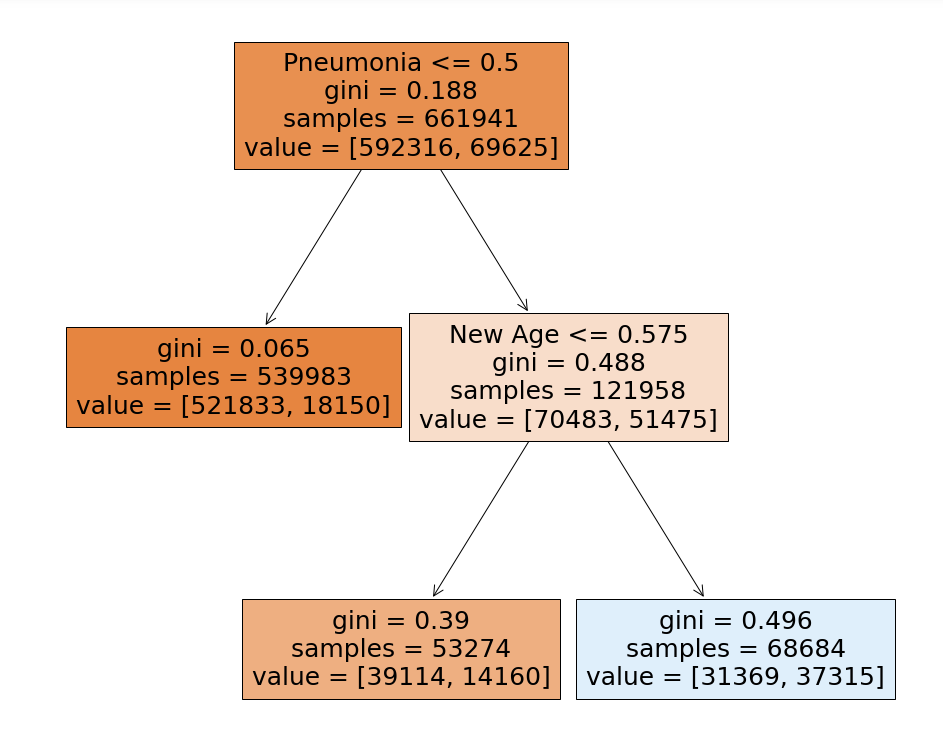

<b>Figure 6: </b>The decision tree above is the result of fitting a tree containing 3 leaf nodes. The tree shows that the only two features needed in order to classify a person as dying or not is Pneumonia and Age (standardized here). This model seems extremely simple, and it appears as if many people with other risk factors would definitely fall between the cracks.

#### Cost Complexity Pruning

Cost complexity pruning was applied to the tree fitting algorithm by adding an alpha term to the cost function. The alpha value ranges from 0 to 0.007. The trade off between the degree of "pruning" and the impurity, tree complexity and accuracy can be seen in the plots below.

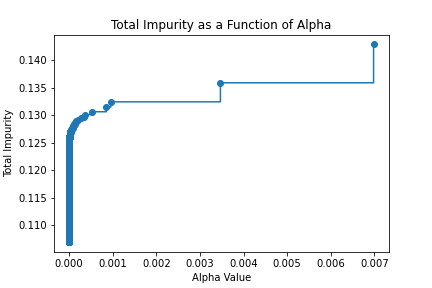

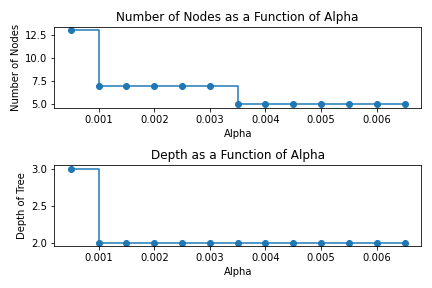

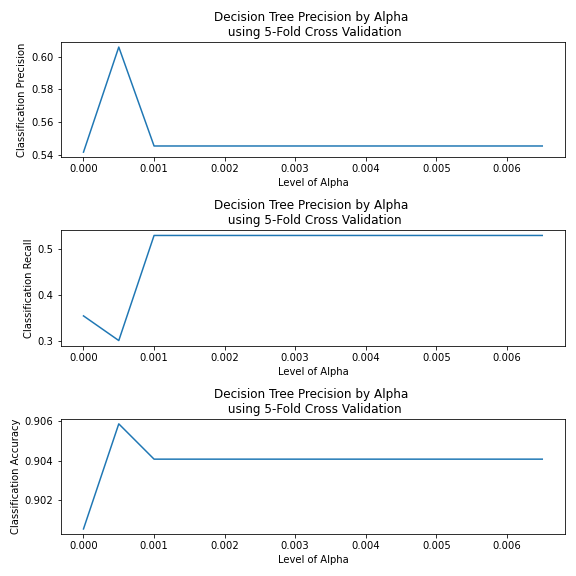

<b>Figure 7: </b>The <b>top plot</b> above shows that as alpha increases, so does the level of total impurity. However, as alpha increases above 0.001, the rate of increase in impurtiy declines substantially. The <b>middle set of two plots </b> shows how the complexity of the tree in terms of nodes and depth changes as alpha increases. Again, after alpha increases above 0.001, the rate of decrease in complexity falls greatly, and the number of nodes and the depth of the tree flattens out. Lastly, the <b>bottom set of three plots</b> shows how the estimated test metrics change as the tree is pruned. The maximum accuracy is found with pruning with alpha of 0.0005. However, at this point, the recall is very low. The value of alpha I would like to use is 0.001.

Since the alpha for which the complexity of the tree flattens is 0.001 and this is where the accuracy, precision, and recall flatten out, I have chosen this alpha to create a pruned tree. The tree can be see below and has an estimated precision, recall, and accuracy of 54.54%, 52.88%, and 90.41% respectively.

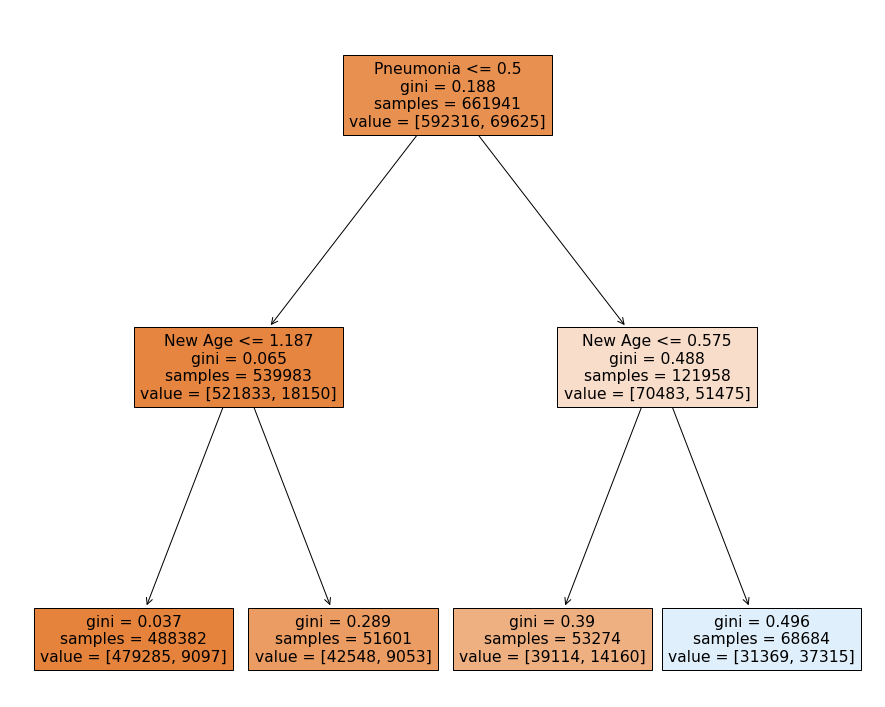

<b>Figure 8: </b>This decision tree shows a great amount of simplicity, only having 4 leaf nodes. The only features necessary in classifying someone as dying or not dying from COVID are Pneumonia and Age (standardized here).

#### Random Forest

Due to Pneumonia being the most important featue to every model explored in this project so far, and the inherent variance found in lone decision trees, random forests seem like a natural last model type to explore. With my large data set, this is very computational intensive, so I am only testing the random forests for trees with 10 and 15 leaf nodes. For each tree complexity (either 10 or 15 leaf nodes), I will test out the use of different counts of trees in the random forest, ranging from 1 to 501, incrementing every 25. In addition, each ranom forest is given the parameter of max features set to 4, meaning the best splits will be found from 4 randomly selected features. I chose 4 because without the interaction terms, there are 18 features, and 4 is pretty close to the square root of 18. The results of the random forest as a function of the number of trees is shown below. Cross validation was implemented with only 3 folds for these models, simply in the interest of computational needs.

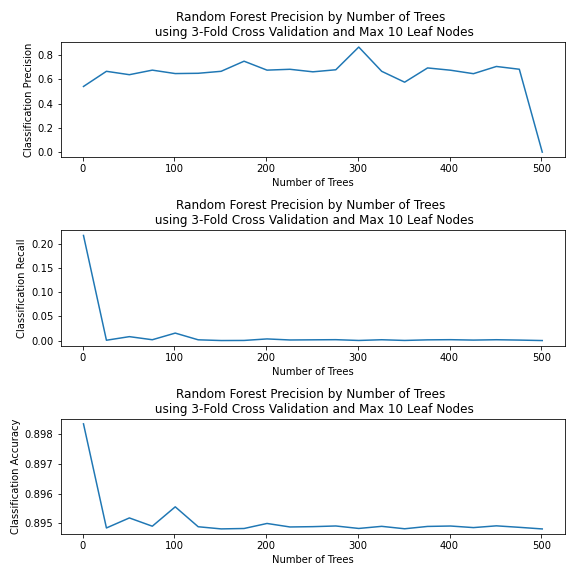

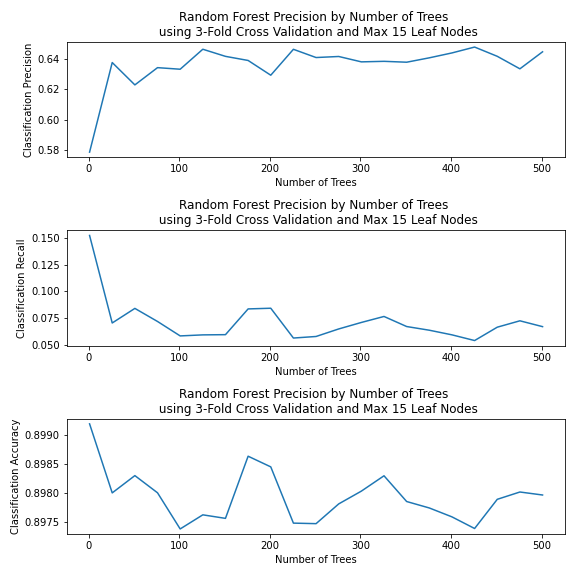

<b>Figure 9: </b> The <b>top three graphs</b> show the results from creating random forests of various sizes fitting trees with no more than 10 leaf nodes. The <b>bottom three graphs</b> show the results from creating random forests of various sizes fitting trees with no more than 15 leaf nodes. These test metrics were estimated using 3-fold cross validation. Between the two, the random forest with no more than 15 leaf nodes per tree performed the best in terms of accuracy. However, both underperform substantially compared to the other models explored in this project.

Out of the two random forests, the forest with trees no more than 15 leaf nodes in size performed the best in terms of accuracy. It performed best when using 176 trees, acheiving an accuracy, precision, and recall of 89.86%, 63.88%, and 8.35% respectively. This is a high precision compared to other models in this project, but the accuracy and recall are both the lowest out of all models considered so far.<br>
To add to this, the accuracy should be converging to the random forests true accuracy as the number of trees involved increases, which makes me think that the accuracy acheived when using 176 trees was the luck of the draw in the randomness of the trees, because the accuracy appears to be converging to ~89.78% as the number of trees increases. Overall, I don't think the random forests will be of any use to this data set.

---
## Results and Discussion
---

From looking at the summary table below, I have chosen the backward selection logistic regression model. This model has the highest estimated accuracy out of all models considered. In addition, out of the logistic regression models considered, it has the highest recall, and the simplest feature make up. When comparing the precision of the backward selection model, we can see that it is comparable to the highest of the other model precisions. Lastly, it has a good (in comparison to the other models) AUC of 91.06%. This is the lowest of the logistic regression models, but higher than those from the decisiont trees. I think that considered the simplicity of the model, and the high recall and accuracy, this model is the best to choose.

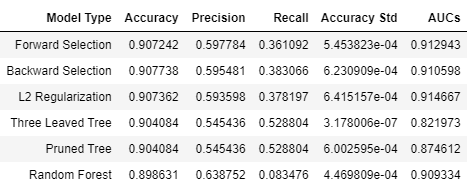

<b>Figure 10: </b>The chart above shows the summary of the estimated test metrics for all considered classification models.

In order to help show the AUC associated with this model, the ROC curve is shown below.

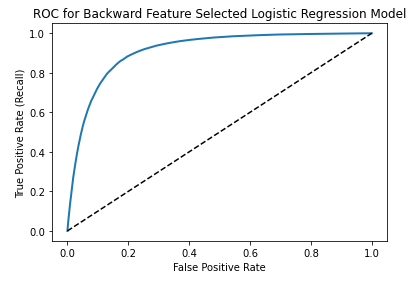

<b>Figure 11: </b>The ROC curve shows how the recall and false positive rate change as a function of each other. The curve is smooth, but seems a little shallow. A good ROC curve will dig deeper into the top left corner of the plot.

Next, the precision recall tradeoff plot below shows how changing the probability cutoff for classification impacts the precision and recall. Logistic Regression by default uses 50% as a cutoff, which is why the precision is much higher than the recall when doing cross validations. However, if I were to lower the cutoff to around 40%, the precision and recall would both be estimated to be around ~55%.

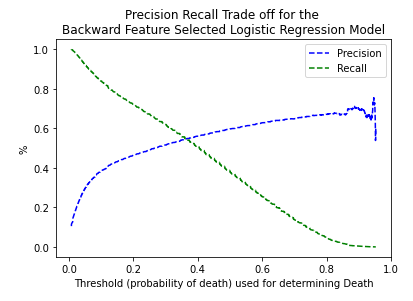

<b>Figure 12: </b>The precision recall plot above shows the trade off between the models precision and recall as the cutoff for classification changes.

According to this precision recall tradeoff plot, if the cutoff was lowered substantially to ~0.1, then the recall would be estimated to rise to ~80%, while the precision would only be estimated to fall to ~40%. This would be a 42% raise in recall at the cost of only a 20% decrease in precision. In the context of a hospital predicting whether or not somebody will die from COVID, lowering the cutoff to 0.1 would mean that roughy 80% of all people that would die from COVID would be predicted by this model. However, out of all the predictions, less than half (40%) of them would actually die. The cutoff chosen would depend on how many 'false alarms' the hospital is willing to accept in order to catch more deaths. <br>
It is also important to note that the overall accuracy of the model will likely decline as the cutoff is moved away from 0.5. Even though lowering the cutoff will raise the recall, the recall applies to less than 10% of the population due to the nature of the data, while the falling precision applies to much more of the data, creating less overall accuracy. Therefore, in this model, the exact cutoff for classification should be determined after more considerations with the people using the model. With my limited knowledge on the topic of hospitalizations, I am choosing the keep the cutoff at 0.5 in order to keep the overall model accuracy maximized.  

When testing the model on the test data, accuracy, recall, and precision slightly lower than estimated from cross validation was acheived. The details can be seen in the figure below.

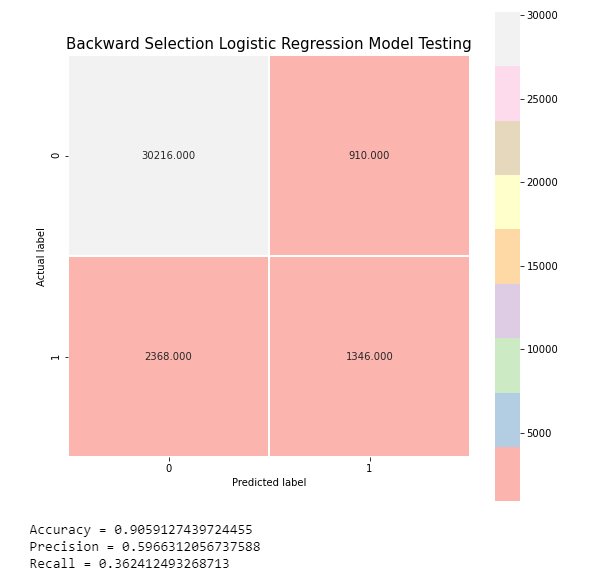

<b>Figure 13: </b> The figure above shows that the backward selection logistic regression model yielded 90.59%, 59.66%, and 36.24% accuracy, precision, and recall, respectively. These are slightly lower than the figures estimated from 5-fold cross validation.

When testing the trained logistic regression model, as shown in the confusion matrix above in Figure 13, the model appears to have performed roughly similarly to the manner it did under 5-fold cross validation. However, the difference in accuracy between the test and cross validation figures is 0.18%. This initally appears to be small, but the standard deviation in the 5-fold estimated test accuracy is ~0.06% as shown in Figure 10. This means that the model tested 3 standard deviations below expected. This along with the low accuracy, recall, and precision of the model during training shows that the model may not be good, and may continue to underperform in future practice.

---
## Conclusion and Summary
---

In conclusion, none of the considered models really offered much predictive capabilities. It seems like all of them almost completely depend on whether or not a person has pneumonia and how old they are. Given that the base accuracy is 89.47%, the cross validation accuracy rate of 90.77% only provides 1.3% more correct classifications than a dummy classifier would. However, the big difference is that the dummy classifier will predict none of the deaths, but this model is predicted to catch roughly 38.3% of the death. This is a huge advantage over a dummy classifier. In addition, the cutoff parameters can be adjusted to catch even more than 38.3% of the deaths (at the cost of more false death classifications of course). However, in theory, when looking at the precision recall curve in Figure 12, you could predict about 80% of the deaths from COVID and 'only' have about 60% of them be false alarms. This is a huge difference from a dummy classifier. <br>
Overall, this model offers a large advantage over a dummy classifier, but it still isn't good enough to predict with confidence. In addition to this, as noted above, the test accuracy ended up falling about 3 standard deviations below the estimated test accuracy from 5-fold cross validation. This means that the model may not perform quite as well in new cases. I certainly don't think this is due to any overfitting, because the model selected is very simple in comparison to other models considered. I think it more has to do with the nature of the problem trying to be solved. COVID is known to have unpredictable impacts on certain people. Therefore, it may be that the model is missing a feature that isn't available in this data set, and risk factors alone aren't enough to predict somebodies outcome from COVID.<br>
In interpreting this model, we can say that pneumonia, kidney failure, age, and sex are the features necessary to predict whether someone will die from COVID. Using the coefficients table below, we can see that pneumonia and kidney failure are accompanied by the largest increases in probability of death. Both of these match the visual interpretations of death rates from Figure 1. Next, this model suggests that both being a male, and being a female lower your chances of death. This can't be true, but rather, what appears to be happening is that the combination of the pneumonia, kidney failure, and age features overestimates the probability of death. Therefore, the sex coefficients are used to counteract it. Since females are shown to have a lower death rate in Figure 1, their probability of death is lowered more than for a male (hence the more negative coefficient than sex_2). <br>
This model seems to be a good starting point for predicting COVID deaths and has recognized some major risk factors. But it certainly is not good enough to make confident decisions from. In a hospital setting, this model may be good to use in conjunction with other metrics, such as heart rate, internal temperature, etc.

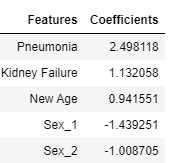

---
## Limitations and Later Work
---

One large limitation to this project is that the data is for COVID cases in Mexico. This means it shouldn't be generalized to the United States since there are large differences in the health care systems. This can be seen when comparing the country-wide death rates. The United States is currently sitting at a ~2.8% death rate from COVID in terms of counted cases. However, Mexico is closer to ~10%. This is a large difference that is likely attributed to differences in available health care and average household income (your ability to pay for treatment). However, I am not very familiar with Mexico's health care system so this is only an inference. <br>
In addition, from the visualization notebook, we saw that of all people sent to the Intensive Care Unit, ~50% end up dying. Also, of people that require intubation, ~80% end up dying. These were not included in this analysis because when someone initially gets COVID, they don't know whether or not they will need intubation or intensive care. They only know what their underlying risk factors are. However, what could be very interesting to look into in the future is predicting a death rate for people given their underlying risk factors, given that they are already either in intensive care or are receiving intubation. This could be done by performing similar model experimentation, but starting out with a data set that consists of a subset that only includes people who either required intubation or required intensive care.<br>
Also, it seems like the Pneumonia feature has "hogged" alot of attention from the models. It would be interesting to do another study that involves ignoring this feature. <br>
Lastly, it would be interesting to do a separate study to see how the quality of health care and annual household income vary by state, and see if there is a link to the death rates of these states.

---
## References and Contributions
---

<b>Author and Data Scientist: </b>David Harper

<b>Language: </b>Python

<b>IDE: </b> Jupyter Notebook and Spyder via Anaconda

<b>Libraries: </b>pandas, json, numpy, matplotlib, sklearn, and seaborn.